In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

## Was there a correlation between the positivity rate and number of tests in Germany?

### Read data

In [2]:
data = pd.read_csv("../data/preprocessed_data/germany_weekly_testing_data.csv")

In [3]:
data.head()

,tests_done,positivity_rate,year,week,time
0,69493,1.300850,2020,10,2020.188679
1,129291,4.977918,2020,11,2020.207547
2,374534,5.981566,2020,12,2020.226415
3,377599,8.996051,2020,13,2020.245283
4,417646,8.632430,2020,14,2020.264151


### Statistical Investigations

Let's first see the general data.

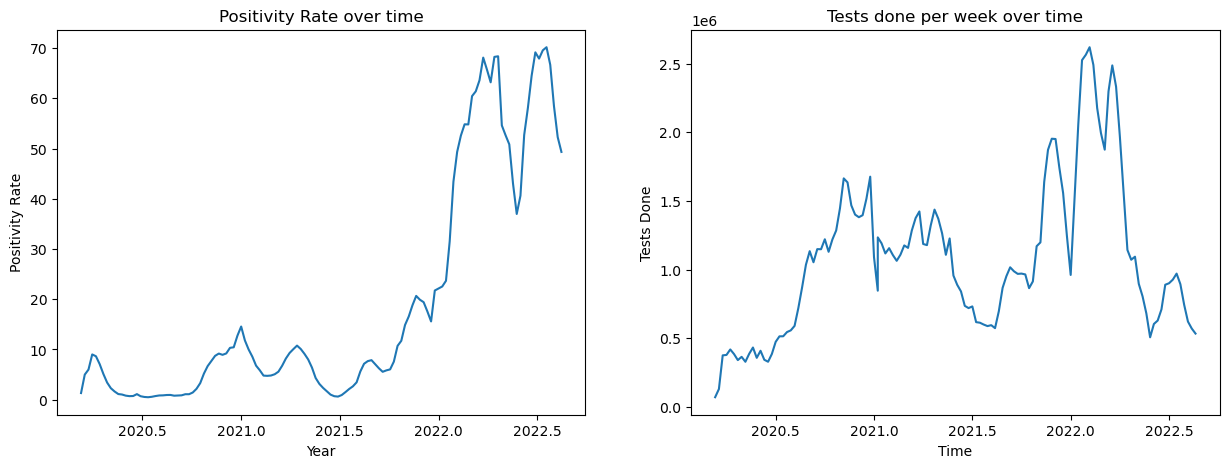

In [4]:
# plot the positivity rate over time
fig, axs = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(5)
ax = axs[0]

ax.plot(data["time"], data["positivity_rate"])
ax.set_xlabel("Year")
ax.set_ylabel("Positivity Rate")
ax.set_title("Positivity Rate over time")
# plot the number of tests done over time
ax = axs[1]
ax.plot(data["year"] + data["week"]/52, data["tests_done"])
ax.set_xlabel("Time")
ax.set_ylabel("Tests Done")
ax.set_title("Tests done per week over time")
plt.show()

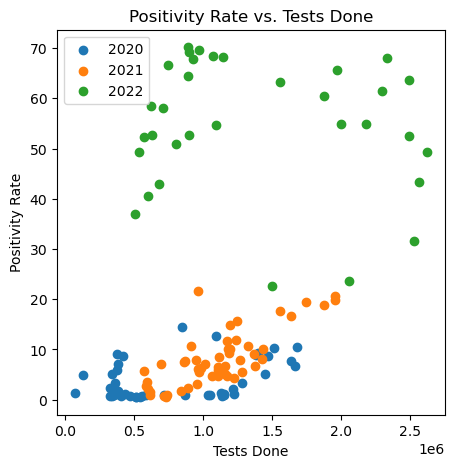

In [11]:
fig, ax = plt.subplots(1,1)
# increase the figure size
fig.set_figwidth(5)
fig.set_figheight(5)
for i, year in enumerate(range(2020, 2023)):
    x = data[data["year"] == year]["tests_done"]
    y = data[data["year"] == year]["positivity_rate"]
    ax.scatter(x, y, color=f"C{i}", label=f"{year}")
    ax.set_xlabel("Tests Done")
    ax.set_ylabel("Positivity Rate")
    ax.set_title(f"Positivity Rate vs. Tests Done")
    ax.legend()
plt.show()

It doesn't look like there is any sort of correlation between the 2 statistics when looking at the entire data.\
But what if we look at each year separately?

In [6]:
def annotate_events(ax: Axes, x_string, y_string, year=None):
    # highlight certain points
    # 2022, week 9 -> no more free tests
    # 2020, week 13 -> 1st Lockdown
    # 2020, week 17 -> RKI recommends more tests
    # 2020, 30.9 -> 2nd wave
    # 2021, week 9 -> more rapid tests

    if year == None:
        for year in range(2020, 2023):
            annotate_events(ax, x_string, y_string, year)
        return

    if year == 2022:
        row = data[(data["year"] == year) & (data["week"] == 9)].iloc[0]
        ax.annotate("no more free tests", (row[x_string], row[y_string]), textcoords="offset points", xytext=(0,5), ha="center")
    if year == 2020:
        row = data[(data["year"] == year) & (data["week"] == 13)].iloc[0]
        ax.annotate("1st Lockdown", (row[x_string], row[y_string]), textcoords="offset points", xytext=(0,5), ha="center")
        row = data[(data["year"] == year) & (data["week"] == 17)].iloc[0]
        ax.annotate("RKI recommends more tests", (row[x_string], row[y_string]), textcoords="offset points", xytext=(0,5), ha="center")
        row = data[(data["year"] == year) & (data["week"] == 39)].iloc[0]
        ax.annotate("2nd wave", (row[x_string], row[y_string]), textcoords="offset points", xytext=(0,5), ha="center")
    if year == 2021:
        row = data[(data["year"] == year) & (data["week"] == 9)].iloc[0]
        ax.annotate("more rapid tests", (row[x_string], row[y_string]), textcoords="offset points", xytext=(0,5), ha="center")

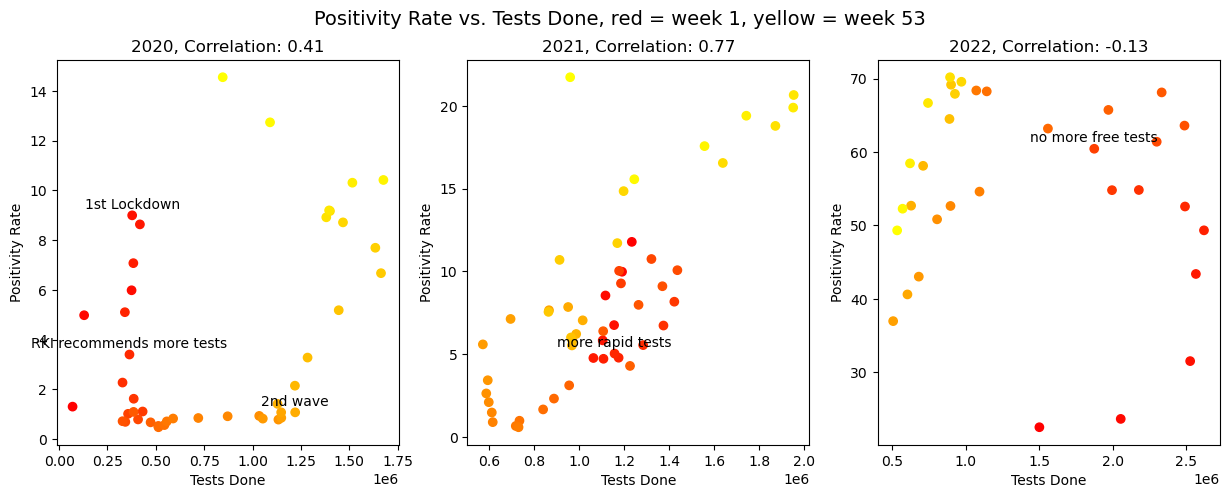

In [7]:
fig, axs = plt.subplots(1,3)
# increase the figure size
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle("Positivity Rate vs. Tests Done, red = week 1, yellow = week 53", fontsize=14)
for i, year in enumerate(range(2020, 2023)):
    ax:Axes = axs[i]
    x = data[data["year"] == year]["tests_done"]
    y = data[data["year"] == year]["positivity_rate"]
    corr = x.corr(y)

    # color gradient per week, scatter plot
    ax.scatter(x, y, c=data[data["year"] == year]["week"], cmap="autumn")
    ax.set_xlabel("Tests Done")
    ax.set_ylabel("Positivity Rate")
    ax.set_title(f"{year}, Correlation: {corr:.2f}")

    annotate_events(ax, "tests_done", "positivity_rate", year)


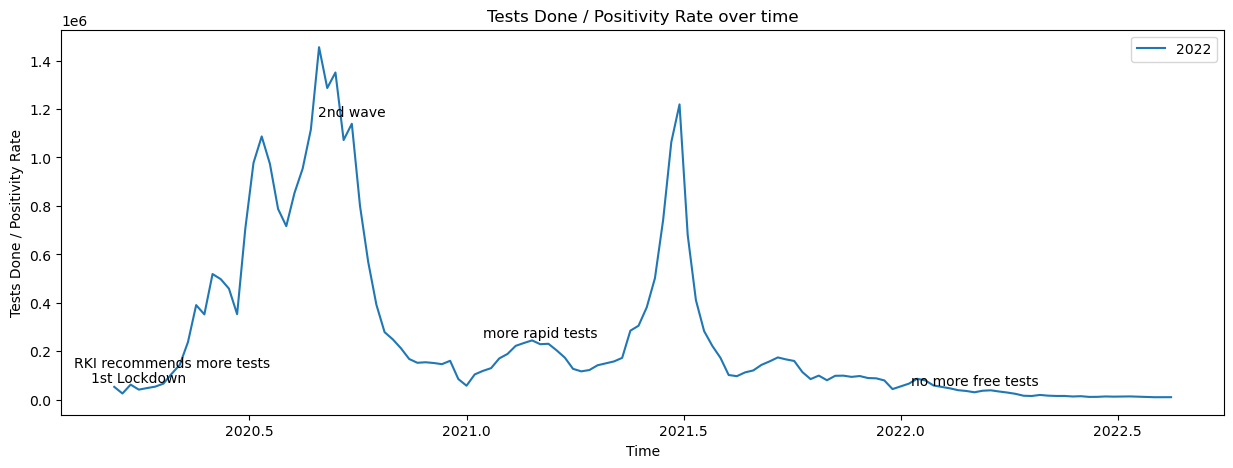

In [8]:
data["tests_done/positivity_rate"] = data["tests_done"] / data["positivity_rate"]

fig, ax = plt.subplots(1,1)
# increase the figure size
fig.set_figwidth(15)
fig.set_figheight(5)

x = data["time"]
y = data["tests_done/positivity_rate"]
ax.plot(x, y, label=f"{year}")
ax.set_xlabel("Time")
ax.set_ylabel("Tests Done / Positivity Rate")
ax.set_title(f"Tests Done / Positivity Rate over time")
ax.legend()

annotate_events(ax, "time", "tests_done/positivity_rate")

plt.show()

Interesting! 

In the beginning of 2020, there were little tests being done despite the high positivity rate. After the first lockdown, positivity rates went down and stayed similar while tests were becoming more common. The ratio of tests per positivity rate was highest in this time.

With the start of the second wave, the number of tests didn't increase by much but the positivity rate increased by a lot. This led to a quick decrease in the ratio of tests per positivity rate. After the second wave, the ratio stayed similar and throughout all of 2021. It even seems like higher positivity rates actually led to more testing which makes sense since people were aware about the importance of testing and the obstacles for getting a test done were fairly low.

2022 started with a peak in positivity rate due to loosened rules and while the testing was also increased at first, it was unable to keep up with the strong positivity rate. Furthermore, in March, no more free tests were offered to everyone which led to a drastic collapse in the number of tests. \
These things led to a static decrease in the ratio of tests per positivity rate in 2022.

There is also a large peak in 2021 when looking at Tests Done / Positivity Rate. This seems to be due to a sudden decrease in the positivity rate in June:

In [9]:
data_2021 = data[(data["year"] == 2021) & (data["week"] >= 24) & (data["week"] <= 28)]
data_2021

,tests_done,positivity_rate,year,week,time,tests_done/positivity_rate
67,735246,0.991233,2021,24,2021.452830,7.417490e+05
68,718914,0.675741,2021,25,2021.471698,1.063889e+06
69,731164,0.599865,2021,26,2021.490566,1.218880e+06
70,616567,0.906957,2021,27,2021.509434,6.798191e+05
71,612370,1.488479,2021,28,2021.528302,4.114065e+05
